In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
raw_data = pd.read_csv('data/churn_modelling.csv', index_col='RowNumber')

In [11]:
raw_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
raw_data.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Encoding Gender

In [13]:
raw_data['Gender_enc'] = raw_data['Gender'].apply(lambda x: 0 if x == 'Female' else 1)

### Encoding Geography

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
geo_encoder = LabelEncoder()

In [16]:
raw_data['Geography_enc'] = geo_encoder.fit_transform(raw_data['Geography'])

In [17]:
geo_encoder.classes_

array(['France', 'Germany', 'Spain'], dtype=object)

### Select only relevant numerical features

In [18]:
data = raw_data.drop(['CustomerId', 'Surname', 'Geography', 'Gender'], axis=1)

### Pair plot

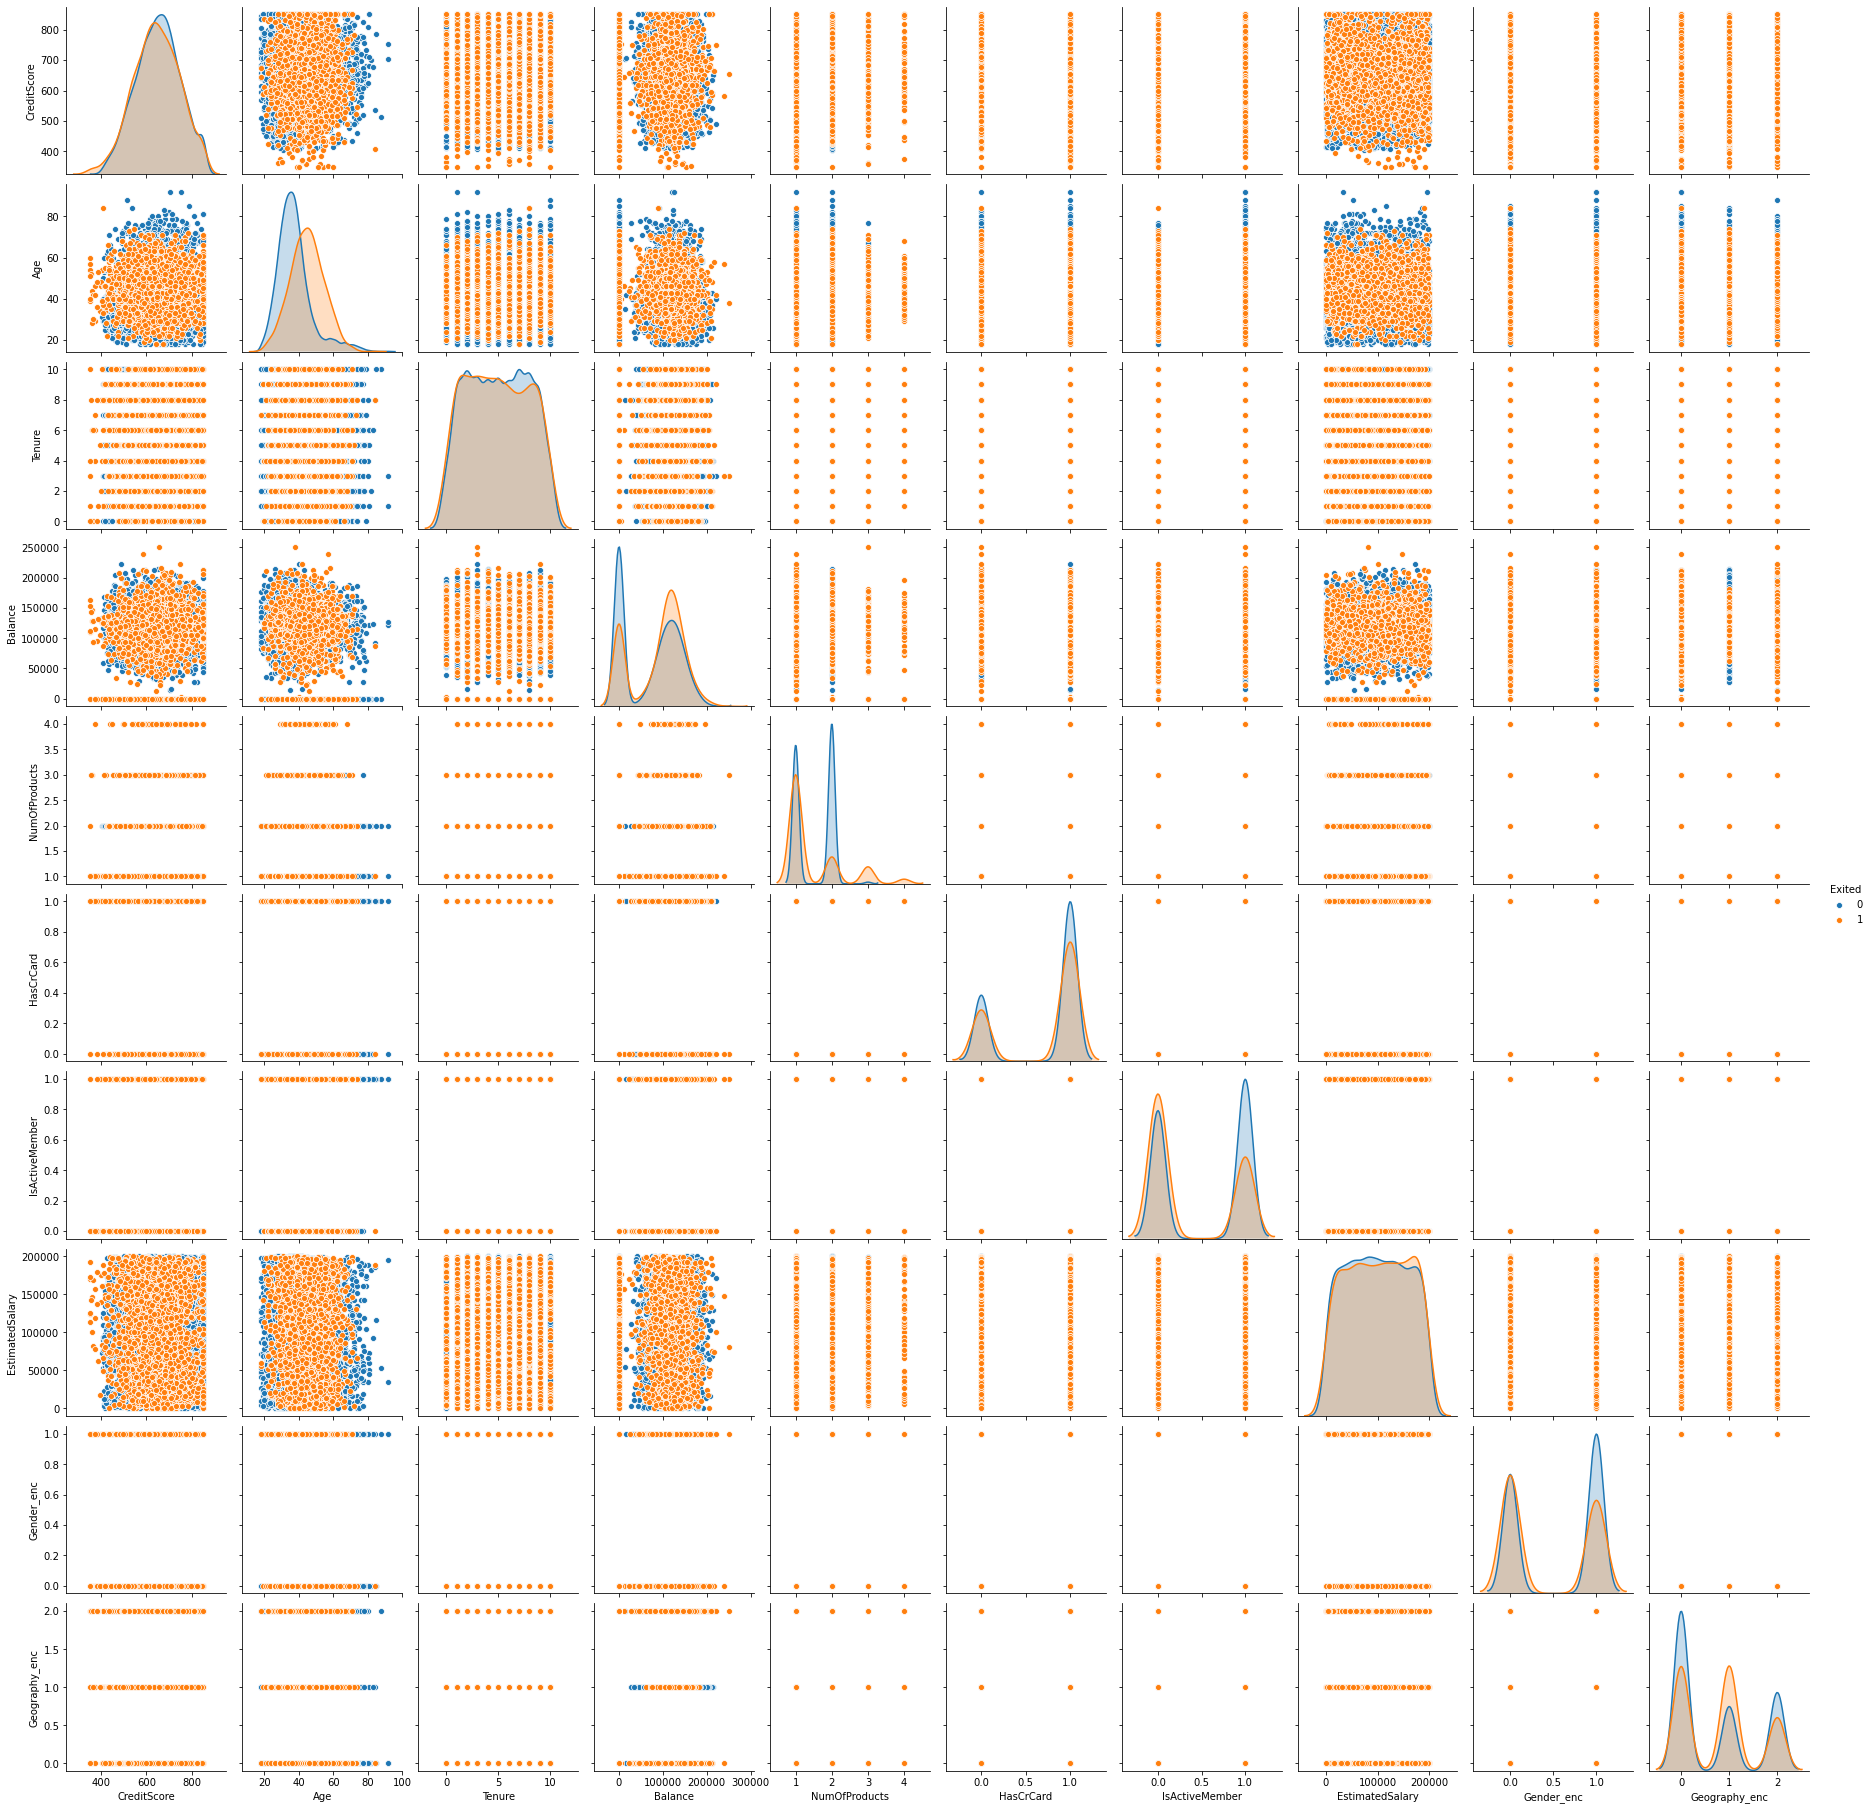

In [19]:
sns.pairplot(data, hue='Exited')

### How many customers did decide to leave?

<AxesSubplot:xlabel='Exited', ylabel='count'>

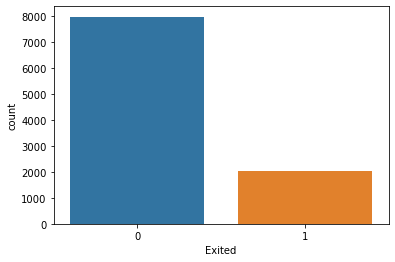

In [20]:
sns.countplot(data['Exited'])

In [21]:
data.groupby('Exited')['Exited'].count() / data['Exited'].count()

Exited
0    0.7963
1    0.2037
Name: Exited, dtype: float64

The data is unbalanced, with only 20% of clients deciding to leave the bank.

### Balancing data

Using [imbalanced-learn](https://github.com/scikit-learn-contrib/imbalanced-learn) library to apply SMOTE technique.

### Age of customers

<AxesSubplot:xlabel='Exited', ylabel='Age'>

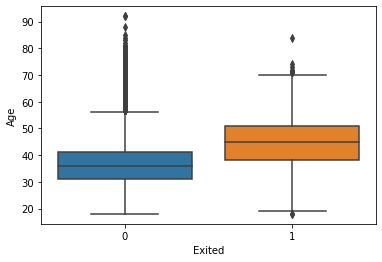

In [26]:
sns.boxplot('Exited', 'Age', data=data)

<AxesSubplot:xlabel='Age'>

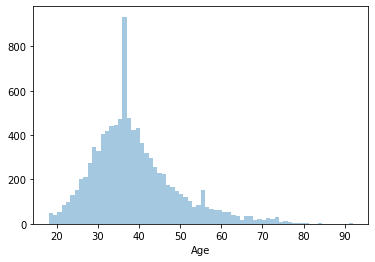

In [32]:
sns.distplot(data['Age'], kde=False, bins=len(set(data['Age'])))

### Credit Score

<AxesSubplot:xlabel='CreditScore'>

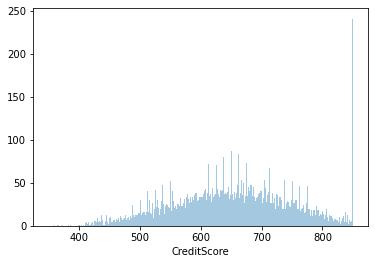

In [33]:
sns.distplot(data['CreditScore'], kde=False, bins=len(set(data['CreditScore'])))

<AxesSubplot:xlabel='Geography', ylabel='count'>

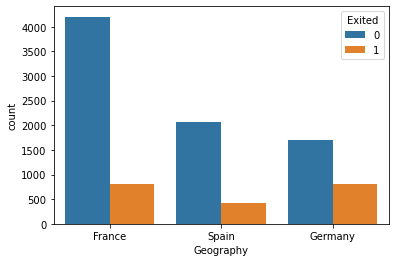

In [9]:
sns.countplot('Geography', hue='Exited', data=data)

<AxesSubplot:xlabel='Exited', ylabel='count'>

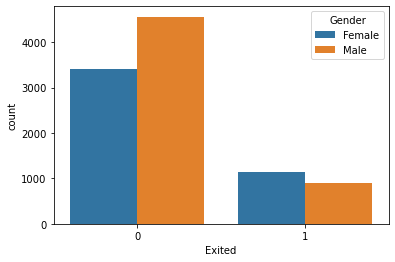

In [13]:
sns.countplot('Exited', hue='Gender', data=data)

In [10]:
x = data.drop(['CustomerId', 'Surname', 'Geography', 'Gender', 'Exited'], axis=1)

In [11]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88
2,608,41,1,83807.86,1,0,1,112542.58
3,502,42,8,159660.80,3,1,0,113931.57
4,699,39,1,0.00,2,0,0,93826.63
5,850,43,2,125510.82,1,1,1,79084.10


In [12]:
y = data['Exited']

In [13]:
y.head()

RowNumber
1    1
2    0
3    1
4    0
5    0
Name: Exited, dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [38]:
x_train = pd.DataFrame(data=scaler.fit_transform(x_train), columns=x_train.columns, index=x_train.index)

In [39]:
x_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,
5467,2.054943,-0.657190,-0.698022,0.981869,-0.914229,-1.528496,0.968237,1.028946
2368,-0.309911,0.015006,1.372714,1.328986,-0.914229,0.654238,-1.032804,-0.344542
4036,1.222103,-0.081022,-1.043145,-1.213091,0.792271,-1.528496,-1.032804,-0.431733
2940,-1.204443,0.015006,-1.043145,-1.213091,-0.914229,-1.528496,0.968237,-0.464993
4995,1.499716,1.263369,1.372714,1.451738,-0.914229,0.654238,0.968237,-0.654250


In [41]:
x_test = pd.DataFrame(data=scaler.transform(x_test), columns=x_test.columns, index=x_test.index)

In [42]:
x_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,
2266,-0.279065,-0.369106,-0.007777,-1.213091,0.792271,0.654238,-1.032804,0.014589
5239,0.749132,-0.849245,-0.698022,0.765189,-0.914229,0.654238,-1.032804,1.077644
5985,0.121932,0.207062,-0.352899,-1.213091,0.792271,0.654238,-1.032804,0.456485
8234,-0.176245,-0.561162,-0.352899,0.266879,-0.914229,0.654238,0.968237,1.036082
9325,1.335205,3.087900,1.372714,1.058947,0.792271,0.654238,0.968237,0.386005


In [52]:
x = x_train.values.T

In [53]:
x.shape

(8, 7500)

In [58]:
w = np.zeros((x.shape[0], 1))

In [59]:
w

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [67]:
b = 0

In [68]:
z = np.dot(w.T, x) + b

In [69]:
a = 1 / (1 + np.exp(-z))

In [82]:
y = y_train.values.reshape(1, -1)

In [83]:
dz = a - y

In [87]:
dw = np.dot(dz, x.T) / len(x_train)

In [88]:
dw

array([[ 0.0122644 , -0.11452923,  0.00415612, -0.04815743,  0.01454436,
         0.0048038 ,  0.05844939, -0.00498528]])

In [90]:
db

0.2969333333333333

In [91]:
dw.shape

(1, 8)

In [94]:
np.dot(x, dz.T) / len(x_train)

array([[ 0.0122644 ],
       [-0.11452923],
       [ 0.00415612],
       [-0.04815743],
       [ 0.01454436],
       [ 0.0048038 ],
       [ 0.05844939],
       [-0.00498528]])

In [95]:
dw

array([[ 0.0122644 , -0.11452923,  0.00415612, -0.04815743,  0.01454436,
         0.0048038 ,  0.05844939, -0.00498528]])

In [143]:
y

array([[0, 1, 0, ..., 0, 0, 1]], dtype=int64)

In [ ]:
def init_weights(num_features):
    return np.zeros((num_features, 1)), 0

In [99]:
w, b = init_weights(x.shape[0])

In [138]:
learning_rate = 0.05

In [147]:
x.shape

(8, 7500)

In [154]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [212]:
import matplotlib.pyplot as plt

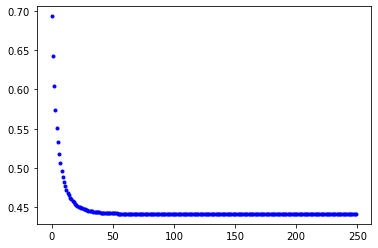

In [221]:
n_epochs = 250
w, b = init_weights(x.shape[0])
prevJ = -1
learning_rate = 0.5

for epoch in range(n_epochs):
    z = np.dot(w.T, x) + b
    a = sigmoid(z)
    dz = a - y
    dw = np.dot(x, dz.T) / len(x_train)
    db = np.sum(dz) / len(x_train)

    J = -np.sum(y * np.log(a) + (1 - y) * np.log(1 - a)) / len(x_train)

    plt.plot(epoch, J, '.', c='b')
        
    prevJ = J
        
    w -= learning_rate * dw
    b -= learning_rate * db
    
plt.show()

In [222]:
w

array([[-0.06839808],
       [ 0.7554008 ],
       [-0.03708903],
       [ 0.32879594],
       [ 0.02844174],
       [-0.0272164 ],
       [-0.50897809],
       [ 0.04137097]])

In [223]:
b

-1.6029635120643495

In [164]:
x_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,
2266,-0.279065,-0.369106,-0.007777,-1.213091,0.792271,0.654238,-1.032804,0.014589
5239,0.749132,-0.849245,-0.698022,0.765189,-0.914229,0.654238,-1.032804,1.077644
5985,0.121932,0.207062,-0.352899,-1.213091,0.792271,0.654238,-1.032804,0.456485
8234,-0.176245,-0.561162,-0.352899,0.266879,-0.914229,0.654238,0.968237,1.036082
9325,1.335205,3.087900,1.372714,1.058947,0.792271,0.654238,0.968237,0.386005


In [173]:
from sklearn.linear_model import LogisticRegression

In [174]:
logreg = LogisticRegression()

In [175]:
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [177]:
logreg_ypredicted = logreg.predict_proba(x_test)

In [178]:
logreg_ypredicted

array([[0.84939264, 0.15060736],
       [0.81631056, 0.18368944],
       [0.7843926 , 0.2156074 ],
       ...,
       [0.95811532, 0.04188468],
       [0.48938844, 0.51061156],
       [0.68963403, 0.31036597]])

In [224]:
nn_ypredicted = sigmoid(np.dot(w.T, x_test.values.T) + b)

In [225]:
nn_ypredicted.T

array([[0.15055384],
       [0.18365268],
       [0.2156207 ],
       ...,
       [0.04179399],
       [0.51088749],
       [0.31050542]])

In [226]:
nn_ypredicted_class = np.where(nn_ypredicted.T < 0.5, 0, 1)

In [227]:
nn_ypredicted_class

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [187]:
from sklearn.metrics import confusion_matrix

In [228]:
confusion_matrix(y_test, nn_ypredicted_class)

array([[1922,   64],
       [ 432,   82]], dtype=int64)

In [198]:
confusion_matrix(y_test, logreg.predict(x_test))

array([[1922,   64],
       [ 432,   82]], dtype=int64)

# Shallow Neural Network

In [261]:
x_train.shape

(7500, 8)

In [254]:
def init_weights(n_nodes, n_features):
    return np.random.rand(n_nodes, n_features) / 100, np.zeros((n_nodes, 1))

In [269]:
w1, b1 = init_weights(4, x_train.shape[1])

In [258]:
def relu(z):
    return np.fmax(0, z)

In [259]:
def forw_propagate(x, w, b, func='sigmoid'):
    z = np.dot(w, x) + b
    if func == 'sigmoid':
        return sigmoid(z)
    elif func == 'relu':
        return relu(z)

In [270]:
x.shape

(8, 7500)

In [273]:
a1 = forw_propagate(x, w1, b1, func='relu')

In [274]:
a1.shape

(4, 7500)

In [275]:
w2, b2 = init_weights(1, a1.shape[0])

In [276]:
a2 = forw_propagate(a1, w2, b2, func='sigmoid')

In [278]:
a2.shape

(1, 7500)

In [ ]:
n_epochs = 250
w, b = init_weights(x.shape[0])
prevJ = -1
learning_rate = 0.5

for epoch in range(n_epochs):
    z = np.dot(w.T, x) + b
    a = sigmoid(z)
    dz = a - y
    dw = np.dot(x, dz.T) / len(x_train)
    db = np.sum(dz) / len(x_train)

    J = -np.sum(y * np.log(a) + (1 - y) * np.log(1 - a)) / len(x_train)

    plt.plot(epoch, J, '.', c='b')
        
    prevJ = J
        
    w -= learning_rate * dw
    b -= learning_rate * db
    
plt.show()